# Evaluation Metrics

PESQ cannot be implemented, since it needs a sampling rate of 8kHz or 16 kHz. Instead, we use STOI and SNR.
#### Configurable Parameters

In [1]:
project_path = '/zhome/6b/8/130425/diffusion_for_speech'
annotation_path = project_path + '/data/annotations.csv'
metrics_path = '/dtu/blackhole/19/s176453/diffusion_for_speech/evaluate'
experiment = '1'
synthesized_path = '/dtu/blackhole/19/s176453/diffusion_for_speech/synthesized_audio'

#### Load necessary libraries and packages


In [4]:
import sys
sys.path.insert(0, project_path)
#from scripts.evaluate import process_annotated_csv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('bmh')

import matplotlib
from IPython.display import Audio, display
import torchaudio
from pathlib import Path

%matplotlib inline
pd.options.display.max_colwidth = 200
pd.options.mode.chained_assignment = None  # default='warn'


audio_path = synthesized_path + '/experiment' + experiment
metrics_csv = metrics_path + '/exp_' + experiment + '_metrics.csv'

/zhome/6b/8/130425/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Evaluation Metrics

PESQ cannot be implemented, since it needs a sampling rate of 8kHz or 16 kHz. Instead, we use STOI and SNR.

#### Configurable Parameters

In [5]:
project_path = '/zhome/6b/8/130425/diffusion_for_speech'
annotation_path = project_path + '/data/annotations.csv'
metrics_path = '/dtu/blackhole/19/s176453/diffusion_for_speech/evaluate'
experiment = '1'
synthesized_path = '/dtu/blackhole/19/s176453/diffusion_for_speech/synthesized_audio'




#### Load necessary libraries and packages



## Multiple Languages Experiment

The following DiffWave models are compared: <br>
 A model trained from scratch in the NST Danish ASR Dataset for 4 epochs; a model trained from scratch in the LJ Speech Dataset for 120 epochs; a pretrained model on the LJ Speech Dataset; and a model that was fine-tuned for 4 epochs on the NST ASR Danish Dataset using the pretrained as the starting point.
 
For an objective evaluation the metrics that are evaluated are the Short-Time Objective Intelligibility (STOI) that is highly correlated with the subjective intelligibility of degraded speech signals and Signal-to-Noise Ratio (SNR), which compares the level of the desired signal to the level of the residual. The evaluation metrics are calculated separately for each dataset, both for the pretrained model, and for each epoch. Furthermore, a network trained from scratch on LJ Speech Dataset for 112 epochs and a network trained from scratch on NST Danish Dataset for 4 epochs are used

In [6]:
df = pd.read_csv(metrics_csv, index_col = 0 )
df = df.reset_index(drop = True)


Below, we extract an array displaying the mean and standard deviations of each model. These values were used to construct the tables in the results section of the report. 

In [ ]:
dfm = df.groupby(["model","dataset"], sort = False).agg([np.mean, np.std])
df_evol = dfm.drop(['hjemmebryg', 'en_from_scratch'])
df_array = dfm.drop(['epoch0','epoch1', 'epoch2', 'epoch3'])
df_array


stoi                 snr          
                                mean       std      mean       std
model           dataset                                           
pretrained      tj          0.967483  0.006104 -2.659290  0.499078
                nst_danish  0.899348  0.097291 -2.728403  1.033152
hjemmebryg      nst_danish  0.827620  0.106267 -2.335513  1.426000
epoch4          tj          0.958136  0.007209 -2.744820  0.500338
                nst_danish  0.921094  0.105471 -2.501964  1.323976
en_from_scratch tj          0.779152  0.018012 -1.396032  0.251718

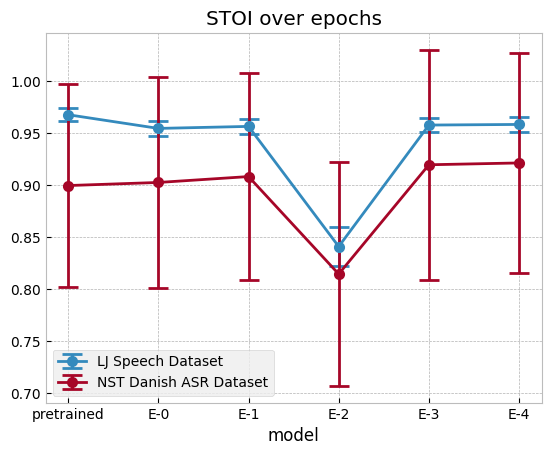

In [ ]:
stoi_plot= df_evol["stoi"].unstack(level=1).plot(y = "mean", yerr = "std", title = "STOI over epochs", marker = 'o', capsize=7, markeredgewidth=2, elinewidth=2)
stoi_plot.set_facecolor('w')
labels = ['','pretrained', 'E-0', 'E-1', 'E-2', 'E-3', 'E-4', '']
_ = stoi_plot.set_xticklabels(labels)
_ = stoi_plot.legend(['LJ Speech Dataset', 'NST Danish ASR Dataset'], loc = 'lower left')

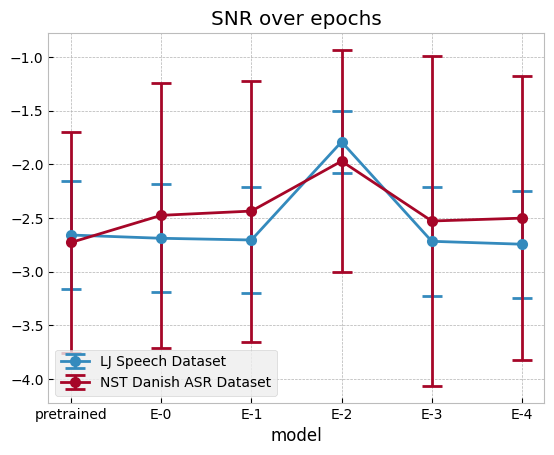

In [ ]:
snr_plot= df_evol["snr"].unstack(level=1).plot(y = "mean", yerr = "std", title = "SNR over epochs", marker = 'o', capsize=7, markeredgewidth=2, elinewidth=2)
snr_plot.set_facecolor('w')
labels = ['','pretrained', 'E-0', 'E-1', 'E-2', 'E-3', 'E-4', '']
_ = snr_plot.set_xticklabels(labels)
_ = snr_plot.legend(['LJ Speech Dataset', 'NST Danish ASR Dataset'], loc = 'lower left')

### A small Demo

First we import a function for playing audio and load the paths of the synthesized audios

In [ ]:
def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

In [ ]:
LJ_own_path = synthesized_path + '/en_from_scratch/epoch120/'
pretrained_path = synthesized_path + '/experiment1/pretrained/'
NST_finetuned_path = synthesized_path + '/experiment1/epoch4/'
nst_own_path = synthesized_path + '/experiment1/hjemmebryg/'

#### 1. LJ Speech Dataset

In [ ]:
dataset = 'tj'
selected_audio = 'synthesized_LJ002-0308.wav'
lj_own_audio, sr = torchaudio.load(LJ_own_path + dataset + '/' +  selected_audio)
print('LJ_own generated audio')
play_audio(lj_own_audio, sr)

pretrained_audio, _ = torchaudio.load(pretrained_path + dataset + '/' +  selected_audio)
print('LJ_pretrained generated audio')
play_audio(pretrained_audio, sr)

nst_finetuned_audio, _ = torchaudio.load(NST_finetuned_path + dataset + '/' +  selected_audio)
print('NST_finetuned generated audio')
play_audio(nst_finetuned_audio, sr)

LJ_own generated audio


LJ_pretrained generated audio


NST_finetuned generated audio


#### 2. NST Danish Dataset

In [ ]:
dataset = 'nst_danish'
selected_audio = 'synthesized_u0049578.wav'

nst_own_audio, sr = torchaudio.load(nst_own_path + dataset + '/' +  selected_audio)
print('nst_own generated audio')
play_audio(nst_own_audio, sr)

pretrained_audio, _ = torchaudio.load(pretrained_path + dataset + '/' +  selected_audio)
print('LJ_pretrained generated audio')
play_audio(pretrained_audio, sr)


nst_finetuned_audio, _ = torchaudio.load(NST_finetuned_path + dataset + '/' +  selected_audio)
print('NST_finetuned generated audio')
play_audio(nst_finetuned_audio, sr)

nst_own generated audio


LJ_pretrained generated audio


NST_finetuned generated audio
